<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/02.%20Week%202/ClassificationCitarumWater_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('CitarumWater.csv')

Saving CitarumWater.csv to CitarumWater.csv


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00


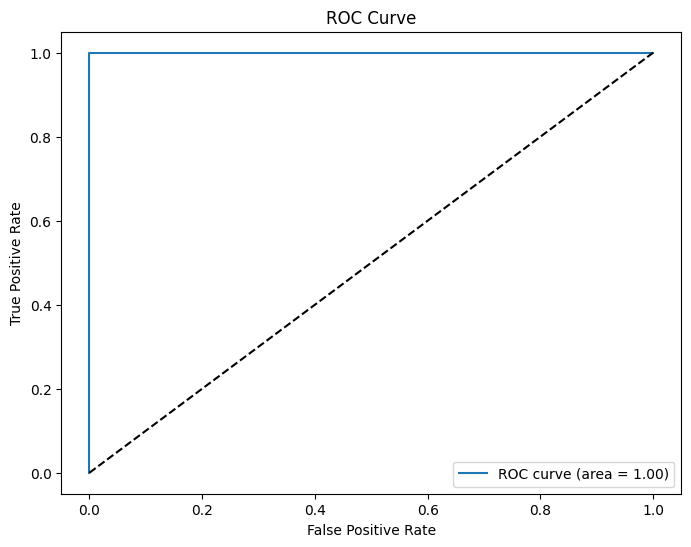


1. Akurasi (Accuracy = 1.00)
   - Rumus: Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - Model mengklasifikasikan semua sampel dengan benar, menunjukkan kemungkinan dataset yang sangat bersih atau overfitting.

2. Presisi (Precision = 1.00)
   - Rumus: Precision = TP / (TP + FP)
   - Tidak ada False Positive (FP = 0), artinya semua prediksi positif benar.

3. Recall (Recall = 1.00)
   - Rumus: Recall = TP / (TP + FN)
   - Tidak ada False Negative (FN = 0), artinya semua sampel positif berhasil diklasifikasikan dengan benar.

4. F1-Score (F1 = 1.00)
   - Rumus: F1 = 2 * (Precision * Recall) / (Precision + Recall)
   - Menunjukkan keseimbangan sempurna antara Precision dan Recall.

5. ROC AUC (AUC = 1.00)
   - Model dapat membedakan antara kelas positif dan negatif dengan sempurna.
   - Jika nilai terlalu tinggi, periksa kemungkinan overfitting.




In [ ]:
df = df.select_dtypes(include=[np.number])

# Replace '-' with NaN and fill missing values with median
df.replace('-', np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# Feature selection (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Ensure target is binary (if needed)
y = np.where(y > y.median(), 1, 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display Results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

explanation = f"""
1. Akurasi (Accuracy = {accuracy:.2f})
   - Rumus: Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - Model mengklasifikasikan semua sampel dengan benar, menunjukkan kemungkinan dataset yang sangat bersih atau overfitting.

2. Presisi (Precision = {precision:.2f})
   - Rumus: Precision = TP / (TP + FP)
   - Tidak ada False Positive (FP = 0), artinya semua prediksi positif benar.

3. Recall (Recall = {recall:.2f})
   - Rumus: Recall = TP / (TP + FN)
   - Tidak ada False Negative (FN = 0), artinya semua sampel positif berhasil diklasifikasikan dengan benar.

4. F1-Score (F1 = {f1:.2f})
   - Rumus: F1 = 2 * (Precision * Recall) / (Precision + Recall)
   - Menunjukkan keseimbangan sempurna antara Precision dan Recall.

5. ROC AUC (AUC = {roc_auc:.2f})
   - Model dapat membedakan antara kelas positif dan negatif dengan sempurna.
   - Jika nilai terlalu tinggi, periksa kemungkinan overfitting.

"""

print(explanation)